Imagine you have a huge dataset with a lot of numbers (features), and you want to simplify it while keeping the most important information. This is exactly what PCA does—it reduces the size of the dataset without losing much information.

For example, if you take a selfie, the image might have thousands of pixels, but PCA helps you find the most important features of your face and reduces the number of pixels needed to recognize you.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**%pip install seaborn**: Installs the **seaborn library** (used for visualization).

**numpy**: Used for numerical computations.

**pandas**: Useful for handling datasets.

**matplotlib.pyplot**: Used for plotting graphs and images.

**seaborn**: Enhances visualization.

In [17]:
from sklearn.datasets import fetch_olivetti_faces # Import dataset from scikit-learn

In [18]:
faces = fetch_olivetti_faces(shuffle= True, random_state= 42) # Load faces

fetch_olivetti_faces(): Loads the Olivetti Faces dataset, which consists of grayscale images of faces (64×64 pixels).

shuffle=True: Randomizes the order of images.

random_state=42: Ensures reproducibility.(Ensures we get the same result every time we run the code.)

In [19]:
x = faces.data # Extracts the face images into a variable X

In [6]:
n_sample, n_features = x.shape  # Get the number of images and number of pixels per image

In [7]:
n_sample

400

In [8]:
n_features

4096

faces.data: Extracts image pixel values as a 2D NumPy array.

X.shape: Returns (n_samples, n_features), where:
n_samples = number of images.

n_features = total pixel count (64 × 64 = 4096).

In [9]:
image_shape = faces.images[0].shape
image_shape

(64, 64)

faces.images[0].shape: Returns (64, 64), confirming that each face image is 64×64 pixels.

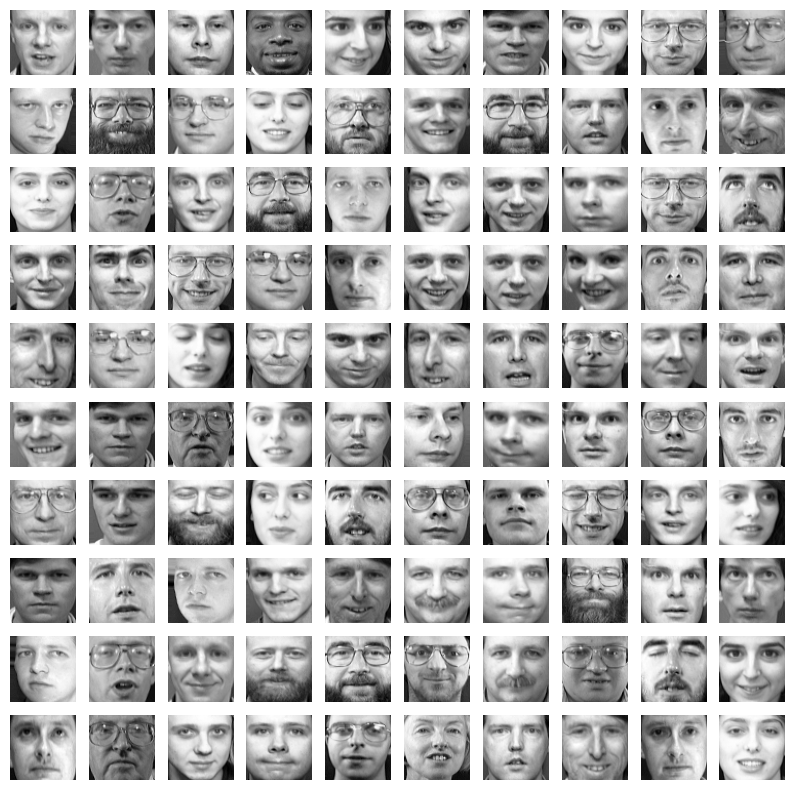

In [10]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(faces.images[i], cmap='gray')
    plt.axis('off')
plt.show()

Displays the first 100 face images.

Uses plt.imshow() with cmap='gray' to show grayscale images.

plt.subplot(10, 10, i + 1): Creates a 10×10 grid for displaying images.

We are drawing 100 face images in a 10×10 grid.
imshow(faces.images[i], cmap='gray') displays each image in black and white.
This helps us see what the dataset looks like before applying PCA.


In [11]:
n_components = 150 # the number of principal components to keep

PCA reduces dimensionality while preserving key features.

We retain 150 principal components.

This tells PCA to reduce our dataset from 4096 features to just 150.
This keeps the most important information while making the dataset much smaller.

In [12]:
from sklearn.decomposition import PCA # Import PCA tool

In [13]:
print(faces.keys())
print(faces.data.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)


In [22]:
print(x.shape)  # Should output something like (400, 4096)

(400, 4096)


In [23]:
pca = PCA(n_components=n_components, whiten=True, random_state=42 )
x_pca = pca.fit_transform(x) # Apply PCA to transform the data

PCA(n_components=n_components, whiten=True, random_state=42):
n_components=150: Keeps 150 principal components.

whiten=True: Normalizes the components. (Makes sure the features are standardized.)

random_state=42: Ensures consistency. (Learns the most important features.
Creates a new version of X (called X_pca) with just 150 key features.)

fit_transform(X): Computes PCA and transforms X into its new lower-dimensional representation.

In [24]:
n_print = 12

print("Propotion of total variation explaine by the first 12 PCs")
for i in range(n_print):
    variance_explained = pca.explained_variance_ratio_[i]
    print(f"PC {i + 1}: {variance_explained*100:.1f}%")

Propotion of total variation explaine by the first 12 PCs
PC 1: 23.8%
PC 2: 14.0%
PC 3: 8.0%
PC 4: 5.0%
PC 5: 3.6%
PC 6: 3.2%
PC 7: 2.4%
PC 8: 2.0%
PC 9: 2.0%
PC 10: 1.7%
PC 11: 1.6%
PC 12: 1.4%


pca.explained_variance_ratio_: Shows the proportion of variance explained by each principal component.

Loops through the first 12 principal components and prints their contribution to the dataset’s variance.

PCA breaks down the information into Principal Components (PCs).
Each PC captures a percentage of the total information.
This prints how much each of the first 12 PCs contribute.

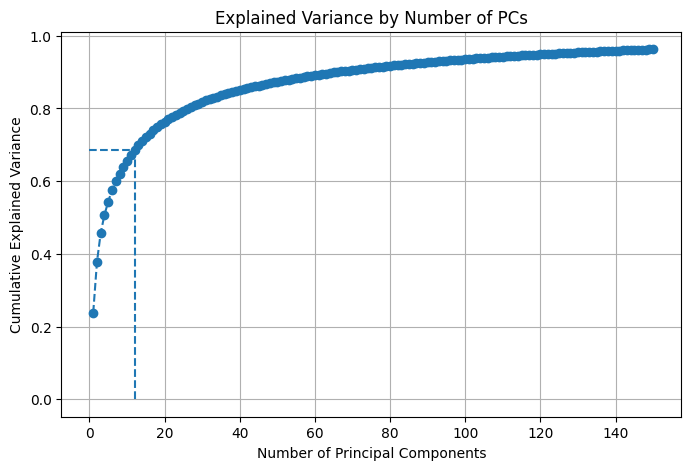

In [25]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
# mark lines
plt.vlines(x=12, ymin=0, ymax=cumulative_variance[11], linestyles='dashed')
plt.hlines(y=cumulative_variance[11], xmin=0, xmax=12, linestyles='dashed')
plt.title('Explained Variance by Number of PCs')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.grid()
plt.show()

np.cumsum(pca.explained_variance_ratio_): Computes cumulative variance.

Plots how much total variance is explained as the number of principal components increases.

Vertical (vlines) and horizontal (hlines) dashed lines highlight where the 12th component is.

This displays the first 12 "eigenfaces" (principal components).
Eigenfaces represent the most important patterns in faces.
Each eigenface doesn’t look like a normal face but captures key facial structures.

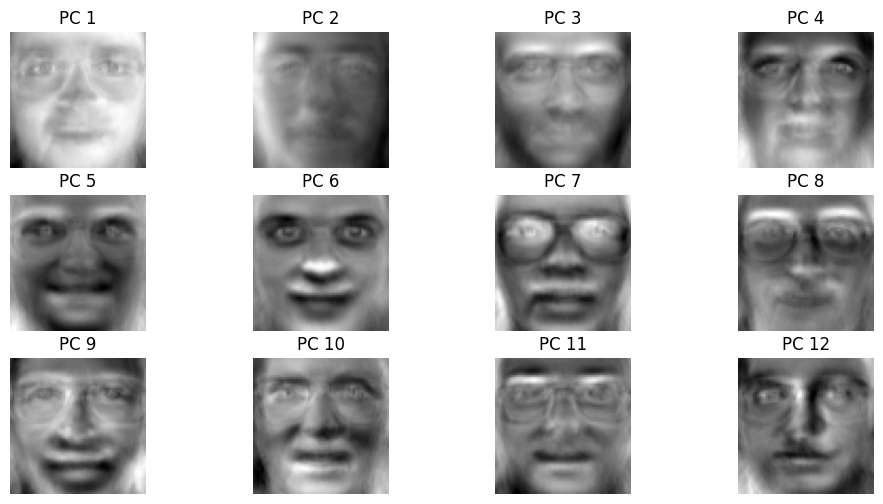

In [26]:
n_eigenfaces = 12
plt.figure(figsize=(12, 6))
for i in range(n_eigenfaces):
    plt.subplot(3, 4, i + 1)
    plt.imshow(pca.components_[i].reshape(image_shape), cmap='gray')
    plt.title(f"PC {i + 1}")
    plt.axis('off')
plt.show()

pca.components_: Contains the principal components (eigenfaces).

Reshapes each component back into a 64×64 image.

Displays the first 12 principal components as images.

**Summary of What the Code Does:**

1. Loads the Olivetti Faces dataset.

2. Extracts image data and displays sample images.

3. Performs PCA to reduce dimensionality while keeping 150 components.

4. Analyzes the explained variance to see how much information is retained.

5. Visualizes the principal components (eigenfaces), which represent important features of faces.

This PCA technique helps in face recognition and data compression by reducing the number of features while keeping essential facial characteristics.